In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime as dte 
from sklearn.linear_model import LinearRegression
import numpy as np

In [133]:
def date_parser(x):
    return dte.strptime(x,"%Y-%m-%d")
df=pd.read_csv("MANAPPURAM.BO (1).csv",parse_dates=[0],date_parser=date_parser)
# df.Date=pd.to_datetime(df.Date)
# df.index=df.Date

df=df.set_index("Date")
df.head()
type(df.index[0])

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-06-01,31.600000,32.500000,31.600000,32.150002,28.012907,54705
2015-06-02,32.150002,32.150002,30.750000,30.799999,26.836620,119029
2015-06-03,30.750000,31.500000,29.299999,30.750000,26.793062,144989
2015-06-04,29.650000,30.549999,29.400000,29.600000,25.791040,257929
2015-06-05,29.600000,29.799999,28.650000,28.850000,25.137552,160281


pandas._libs.tslibs.timestamps.Timestamp

In [134]:
data=df.Close
data
train_df=df[:int(data.index.size/2)]
test_df=df[int(data.index.size/2):]
# train_df.info()

Date
2015-06-01     32.150002
2015-06-02     30.799999
2015-06-03     30.750000
2015-06-04     29.600000
2015-06-05     28.850000
2015-06-08     27.299999
2015-06-09     28.150000
2015-06-10     27.750000
2015-06-11     27.200001
2015-06-12     27.950001
2015-06-15     28.799999
2015-06-16     28.000000
2015-06-17     28.150000
2015-06-18     29.450001
2015-06-19     28.400000
2015-06-22     29.500000
2015-06-23     28.799999
2015-06-24     28.549999
2015-06-25     27.850000
2015-06-26     27.750000
2015-06-29     27.850000
2015-06-30     28.100000
2015-07-01     28.150000
2015-07-02     27.750000
2015-07-03     27.950001
2015-07-06     28.250000
2015-07-07     28.350000
2015-07-08     27.950001
2015-07-09     27.900000
2015-07-10     27.549999
                 ...    
2019-04-16    126.050003
2019-04-18    124.449997
2019-04-22    120.550003
2019-04-23    118.199997
2019-04-24    119.250000
2019-04-25    119.449997
2019-04-26    119.400002
2019-04-30    117.900002
2019-05-02    117.30

In [100]:
# model=LinearRegression()
# model.fit(list(train_df.index)
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(np.log(train_df.Close), order = (1,0,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pylab as plt

data_1 = pd.read_csv('AirPassengers.csv')
avg= data_1['#Passengers']
avg=list(avg)
res = pd.Series(avg, index=pd.to_datetime(data_1['Month'],format='%Y-%m'))

ts=np.log(res)
ts_diff = ts - ts.shift()
ts_diff.dropna(inplace=True)
r = ARIMA(ts,(2,1,2))
r = r.fit(disp=-1)

pred = r.predict(start='1961-01',end='1970-01')
dates = pd.date_range('1961-01','1970-01',freq='M')

predictions_ARIMA_diff = pd.Series(pred, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts.ix[0])
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(res)
plt.plot(predictions_ARIMA)

plt.show()

print predictions_ARIMA.head()
print ts.head()

ValueError: could not broadcast input array from shape (2,2) into shape (2)

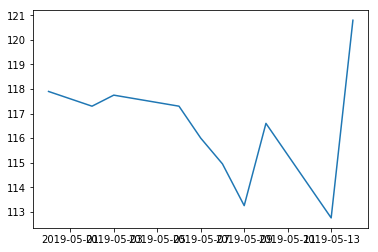

In [82]:
# model_fit.forecast(start="2019-05-01",end="2019-05-10")
ARIMA_forecast=model_fit.forecast(2)[0]
plt.plot(np.exp(np.log(train_df.Close)), label = "Original")
plt.plot(np.exp(ARIMA_forecast), label = 'Forecast')


In [70]:
plt(model_fit.forecast(10)[0])

TypeError: 'module' object is not callable

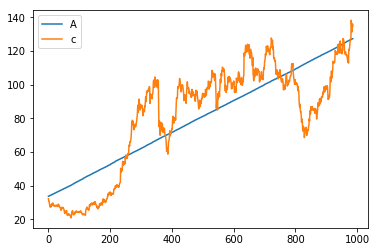

In [146]:
linear=LinearRegression()
index_arr=np.array(df.index)
index_arr.shape=len(index_arr),1
def func(x):
    li=[]
    for val in x:
        val_str=str(val).split("T")[0].replace("]","").replace("[","").replace("'","")
#         print(val_str)
        timestamp=int(time.mktime(time.strptime(str(val_str),"%Y-%m-%d")))
#         print(timestamp)
        li.append(timestamp)
    return li
li=func(index_arr)
li_np=np.array(li)

data_arr=np.array(data)
li_np.shape=len(li_np),1
data_arr.shape=len(data_arr),1
# print(data_arr)
result=linear.fit(li_np,data_arr)
# print(result.score(li_np,data_arr))
# import time 

# date_to_predict=time.strptime("2019-04-30","%Y-%m-%d")
# converted_array=int(time.mktime(date_to_predict))
predicted_result=result.predict(li_np)
# plt.plot()
predicted_result_plt=[val[0] for val in predicted_result]
data_arr_plt=[val[0] for val in data_arr]
plt.plot(predicted_result_plt,Label="Prediction")
plt.plot(data_arr_plt,Label="Actual")
plt.legend("Actual")
plt.show()